In [118]:
import pandas_datareader as pdr
import pandas as pd
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
df = pd.read_csv('AAPL.csv')
df.head(50)

df.shape

(1258, 14)

In [89]:
# Check for null values
df.isnull().values.any()

False

In [90]:
df.shape

(1258, 14)

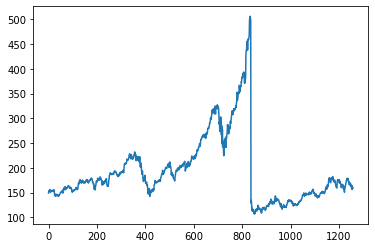

In [91]:
plt.plot(df['close'])

### For timeseries datasets:-
1. Split data into train-test in sequence and not in random.
2. Scaling the data using MinMaxScaler.
2. Set the timestep for prediction based on previous values.

In [92]:
# Splitting the data into train and test (NOT AT RANDOM)
train_size = int(len(df)*0.65)
test_size = len(df)-train_size
train_data, test_data = df[0:train_size:], df[train_size:len(df):1]
print('Train data', len(train_data))
print('Test data', len(test_data))

Train data 817
Test data 441


In [93]:
# Scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
col_scale = ['close']
train_data = scaler.fit_transform(train_data[col_scale])
test_data = scaler.fit_transform(test_data[col_scale])


In [94]:
df_train = pd.DataFrame(train_data, columns=col_scale)
df_test = pd.DataFrame(test_data, columns=col_scale)
train_data = df_train['close']
test_data = df_test['close']
print('Train data', train_data.shape)
print('Test data', test_data.shape)

Train data (817,)
Test data (441,)


In [95]:
def create_ds(ds, timeStep=1):
    dX, dY = [], []
    for i in range(len(ds)-timeStep-1):
        x = ds[i: i+timeStep]
        dX.append(x)
        dY.append(ds[i+timeStep])
    return np.array(dX), np.array(dY)

In [96]:
timeStep = 100
X_train, y_train = create_ds(np.array(train_data), timeStep)
X_test, y_test = create_ds(np.array(test_data), timeStep)
print('Train data', X_train.shape, X_test.shape)
print('Test data', y_train.shape, y_test.shape)

Train data (716, 100) (340, 100)
Test data (716,) (340,)


In [97]:
# Converting [samples, timesteps] into [samples, timesteps, features]
# Note: LSTM requires it's input data to be of 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print('Train data', X_train.shape, X_test.shape)

Train data (716, 100, 1) (340, 100, 1)


In [98]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 169ms/step - loss: 0.0425 - val_loss: 0.0038
Epoch 2/100
12/12 [==============================] - 1s 102ms/step - loss: 0.0068 - val_loss: 0.0028
Epoch 3/100
12/12 [==============================] - 1s 100ms/step - loss: 0.0030 - val_loss: 3.8741e-04
Epoch 4/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0025 - val_loss: 3.0925e-04
Epoch 5/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0021 - val_loss: 4.1541e-04
Epoch 6/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0019 - val_loss: 2.9278e-04
Epoch 7/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0018 - val_loss: 2.8457e-04
Epoch 8/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0017 - val_loss: 2.7359e-04
Epoch 9/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0016 - val_loss: 2.5328e-04
Epoch 10/100
12/12 [==============================] - 1s 105ms/

12/12 [==============================] - 1s 106ms/step - loss: 6.1873e-04 - val_loss: 1.2874e-04
Epoch 77/100
12/12 [==============================] - 1s 103ms/step - loss: 6.5424e-04 - val_loss: 1.5538e-04
Epoch 78/100
12/12 [==============================] - 1s 104ms/step - loss: 6.4494e-04 - val_loss: 1.8695e-04
Epoch 79/100
12/12 [==============================] - 1s 113ms/step - loss: 6.5598e-04 - val_loss: 1.3253e-04
Epoch 80/100
12/12 [==============================] - 1s 116ms/step - loss: 6.0382e-04 - val_loss: 1.2462e-04
Epoch 81/100
12/12 [==============================] - 1s 105ms/step - loss: 5.8097e-04 - val_loss: 1.2378e-04
Epoch 82/100
12/12 [==============================] - 1s 107ms/step - loss: 6.0057e-04 - val_loss: 1.2328e-04
Epoch 83/100
12/12 [==============================] - 1s 106ms/step - loss: 6.1756e-04 - val_loss: 1.5177e-04
Epoch 84/100
12/12 [==============================] - 1s 104ms/step - loss: 6.0533e-04 - val_loss: 1.5648e-04
Epoch 85/100
12/12 [===

In [113]:
tp = model.predict(X_train)
ttp = model.predict(X_test)
display(tp.shape)
display(ttp.shape)

(716, 1)

(340, 1)

In [114]:
# Inversing the scaled value for model evaluation
train_predict = scaler.inverse_transform(tp)
test_predict = scaler.inverse_transform(ttp)
y_t = y_train.reshape(y_train.shape[0],1)
y_tt = y_test.reshape(y_test.shape[0],1)
y_t = scaler.inverse_transform(y_t)
y_tt = scaler.inverse_transform(y_tt)

In [121]:
# Generating rmse on the train-test data
rmseX = np.sqrt(mean_squared_error(y_t, train_predict))
rmseY = np.sqrt(mean_squared_error(y_tt, test_predict))
mseX = mean_squared_error(y_t, train_predict)
mseY = mean_squared_error(y_tt, test_predict)
r2X = r2_score(y_t, train_predict)
r2Y = r2_score(y_tt, test_predict)
print('MSE | RMSE | R2 train: ', mseX, rmseX, r2X)
print('MSE | RMSE | R2 test: ', mseY, rmseY, r2Y)

MSE | RMSE | R2 train:  74.3131786977348 8.620509190165903 0.9881487275856594
MSE | RMSE | R2 test:  17.694367517214314 4.206467344127886 0.9417215523134895


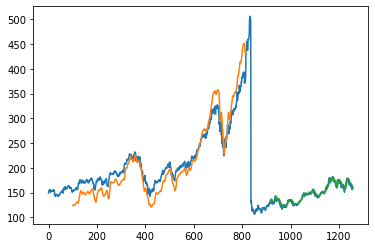

In [116]:
lookBack = 100

df12 = pd.concat([train_data, test_data])
df12 = np.array(df12)
df12 = df12.reshape(df12.shape[0],1)

trainPredPlot = np.empty_like(df12)
trainPredPlot[:,:] = np.nan
trainPredPlot[lookBack:len(train_predict)+lookBack,:] = train_predict

testPredPlot = np.empty_like(df12)
testPredPlot[:,:] = np.nan
testPredPlot[len(train_predict)+(lookBack*2)+1: len(df['close'])-1:] = test_predict

plt.plot(df['close'])
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()

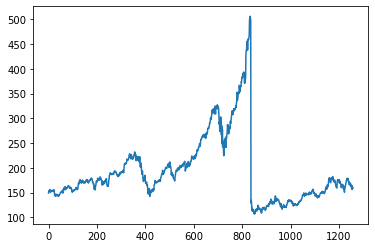

In [117]:
plt.plot(df['close'])

22259.5919779889